In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from scipy import stats
import random

In [2]:
columns = ['tweet_id', 'publisher_id', 'tweet_content', 'publisher_name', 'datetime', 'likes', 'retweets', 'hashtags']

df = pd.read_csv('elonmusk_tweets_extended.csv', names=columns)

In [3]:
df.head()

,tweet_id,publisher_id,tweet_content,publisher_name,datetime,likes,retweets,hashtags
0,1344044584712728581,44196397,All Tesla cars delivered in the final three da...,Elon Musk,2020-12-29 22:16:14,73052,3507,[]
1,1344154578678214657,44196397,"Destiny, destinyNo escaping that for me",Elon Musk,2020-12-30 05:33:19,155133,11438,[]
2,1344190775182016512,44196397,@tobyliiiiiiiiii Are we sure this is real?,Elon Musk,2020-12-30 07:57:09,5680,179,[]
3,1344210828052946944,44196397,@harsimranbansal Literally,Elon Musk,2020-12-30 09:16:50,3033,56,[]
4,1344212785228435457,44196397,@Tesmanian_com This is very sensible. Oppositi...,Elon Musk,2020-12-30 09:24:36,4322,165,[]


In [4]:
df = df.drop(['tweet_id', 'publisher_id', 'publisher_name', 'hashtags'], axis=1)

In [5]:
df.head()

,tweet_content,datetime,likes,retweets
0,All Tesla cars delivered in the final three da...,2020-12-29 22:16:14,73052,3507
1,"Destiny, destinyNo escaping that for me",2020-12-30 05:33:19,155133,11438
2,@tobyliiiiiiiiii Are we sure this is real?,2020-12-30 07:57:09,5680,179
3,@harsimranbansal Literally,2020-12-30 09:16:50,3033,56
4,@Tesmanian_com This is very sensible. Oppositi...,2020-12-30 09:24:36,4322,165


In [6]:
df.datetime = pd.to_datetime(pd.to_datetime(df.datetime).dt.date)

In [7]:
df.head()

,tweet_content,datetime,likes,retweets
0,All Tesla cars delivered in the final three da...,2020-12-29,73052,3507
1,"Destiny, destinyNo escaping that for me",2020-12-30,155133,11438
2,@tobyliiiiiiiiii Are we sure this is real?,2020-12-30,5680,179
3,@harsimranbansal Literally,2020-12-30,3033,56
4,@Tesmanian_com This is very sensible. Oppositi...,2020-12-30,4322,165


In [8]:
dogecoin_data = pd.read_csv('dogecoin.csv')

In [9]:
dogecoin_data.shape

(1827, 7)

In [10]:
dogecoin_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,1.052665e+10
1823,2021-05-04,0.440274,0.605998,0.400800,0.541334,0.541334,3.823813e+10
1824,2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,4.252510e+10
1825,2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,1.898990e+10
1826,2021-05-07,0.582930,0.653523,0.520342,0.645051,0.645051,2.076569e+10


### Convert str date to date

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)

In [12]:
dogecoin_data['datetime'] = pd.to_datetime(dogecoin_data.Date)

In [13]:
df.head()

,tweet_content,datetime,likes,retweets
0,All Tesla cars delivered in the final three da...,2020-12-29,73052,3507
1,"Destiny, destinyNo escaping that for me",2020-12-30,155133,11438
2,@tobyliiiiiiiiii Are we sure this is real?,2020-12-30,5680,179
3,@harsimranbansal Literally,2020-12-30,3033,56
4,@Tesmanian_com This is very sensible. Oppositi...,2020-12-30,4322,165


In [14]:
df.describe()

,likes,retweets
count,9.590000e+02,959.000000
mean,7.553052e+04,6231.608968
std,1.412828e+05,15516.214275
min,8.710000e+02,21.000000
25%,4.983500e+03,230.000000
50%,1.254200e+04,618.000000
75%,7.458800e+04,3712.500000
max,1.001120e+06,149329.000000


# EDA

### Transfrom all tweet content into lowercase

In [15]:
df.tweet_content = df.tweet_content.str.lower()

# Search for dogecoin mentions

In [16]:
tweets_about_dogecoin_indeces = df.tweet_content.str.find('doge')
df['isDogecoin'] = 0
df.loc[tweets_about_dogecoin_indeces >= 0, 'isDogecoin'] = 1

In [17]:
df.head()

,tweet_content,datetime,likes,retweets,isDogecoin
0,all tesla cars delivered in the final three da...,2020-12-29,73052,3507,0
1,"destiny, destinyno escaping that for me",2020-12-30,155133,11438,0
2,@tobyliiiiiiiiii are we sure this is real?,2020-12-30,5680,179,0
3,@harsimranbansal literally,2020-12-30,3033,56,0
4,@tesmanian_com this is very sensible. oppositi...,2020-12-30,4322,165,0


In [18]:
df.datetime.min()

Timestamp('2020-12-29 00:00:00')

In [19]:
df.datetime.max()

Timestamp('2021-05-07 00:00:00')

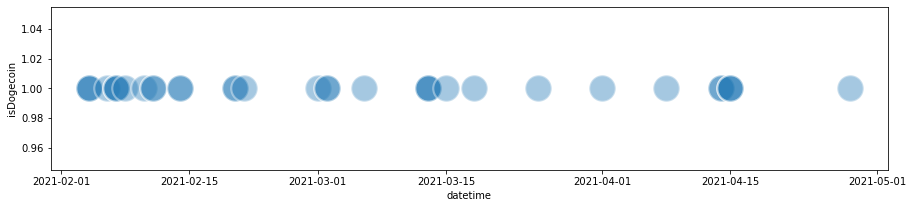

In [95]:
plt.figure(figsize=(15, 3))
sns.scatterplot(data=df, x=df.datetime, y=df.isDogecoin[df.isDogecoin == 1], s=700, alpha=0.4);

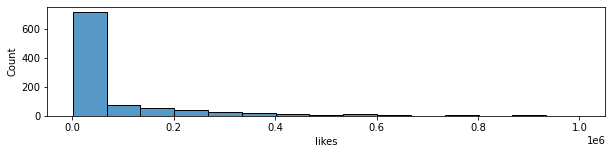

In [21]:
plt.figure(figsize=(10, 2))
sns.histplot(df.likes, bins=15);

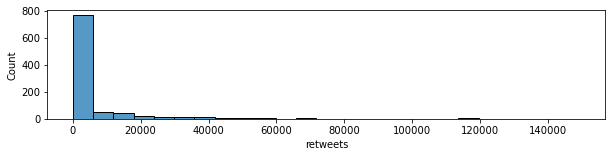

In [22]:
plt.figure(figsize=(10, 2))
sns.histplot(df.retweets, bins=25);

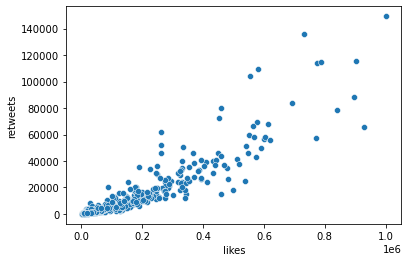

In [23]:
sns.scatterplot(x=df.likes, y=df.retweets);

There we can see a linera correlation between tweets and likes

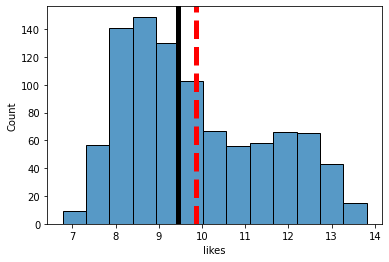

In [24]:
likes_log = np.log(df.likes)

likes_mean = likes_log.mean()
likes_median = likes_log.median()

sns.histplot(likes_log);
plt.axvline(likes_mean, color='red', linestyle='--', linewidth=5);
plt.axvline(likes_median, color='black', linestyle='-', linewidth=5);

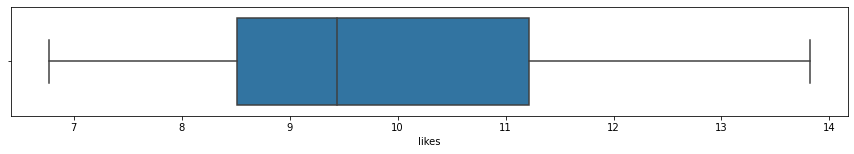

In [25]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=np.log(df.likes));

In [26]:
df.head()

,tweet_content,datetime,likes,retweets,isDogecoin
0,all tesla cars delivered in the final three da...,2020-12-29,73052,3507,0
1,"destiny, destinyno escaping that for me",2020-12-30,155133,11438,0
2,@tobyliiiiiiiiii are we sure this is real?,2020-12-30,5680,179,0
3,@harsimranbansal literally,2020-12-30,3033,56,0
4,@tesmanian_com this is very sensible. oppositi...,2020-12-30,4322,165,0


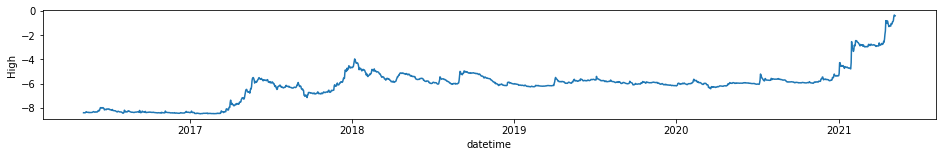

In [27]:
plt.figure(figsize=(16, 2))
sns.lineplot(y=np.log(dogecoin_data.High), x=dogecoin_data.datetime);

In [28]:
dogecoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2016-05-07,0.000224,0.000225,0.000221,0.000223,0.000223,83754.0,2016-05-07
1,2016-05-08,0.000222,0.000223,0.000220,0.000222,0.000222,46961.0,2016-05-08
2,2016-05-09,0.000222,0.000225,0.000220,0.000224,0.000224,75340.0,2016-05-09
3,2016-05-10,0.000222,0.000224,0.000220,0.000220,0.000220,76419.0,2016-05-10
4,2016-05-11,0.000220,0.000224,0.000220,0.000224,0.000224,71369.0,2016-05-11


# Highest price

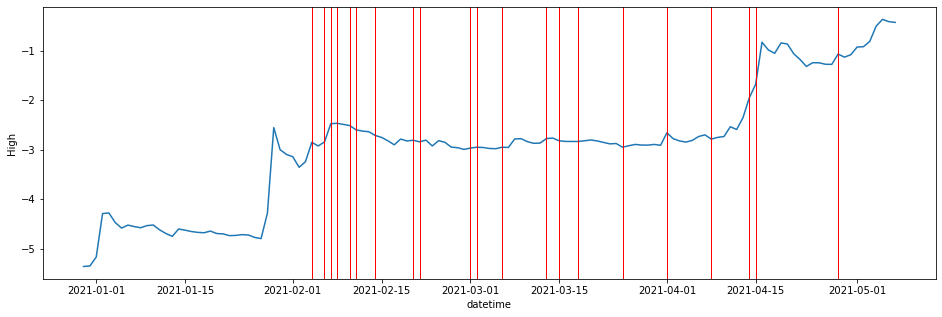

In [29]:
plt.figure(figsize=(16, 5))
sns.lineplot(y=np.log(dogecoin_data.loc[dogecoin_data.datetime > df.datetime.min(), 'High']), x=dogecoin_data.datetime);

for date in df.loc[df.isDogecoin == 1, 'datetime']:
    plt.axvline(date, color='red', linestyle='-', linewidth=1);

# Lowest price

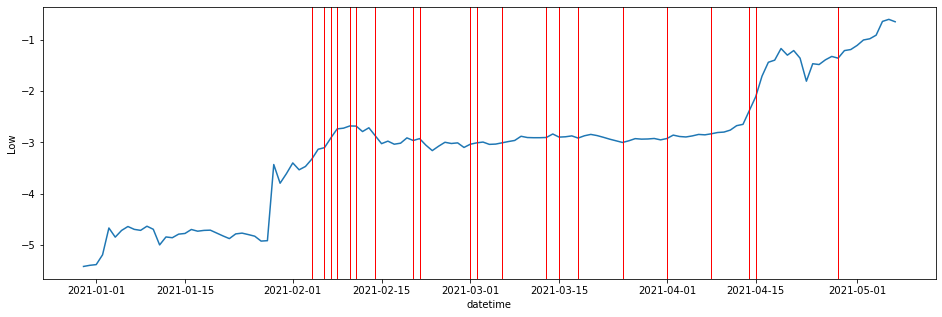

In [30]:
plt.figure(figsize=(16, 5))
sns.lineplot(y=np.log(dogecoin_data.loc[dogecoin_data.datetime > df.datetime.min(), 'Low']), x=dogecoin_data.datetime);

for date in df.loc[df.isDogecoin == 1, 'datetime']:
    plt.axvline(date, color='red', linestyle='-', linewidth=1);

# Open price

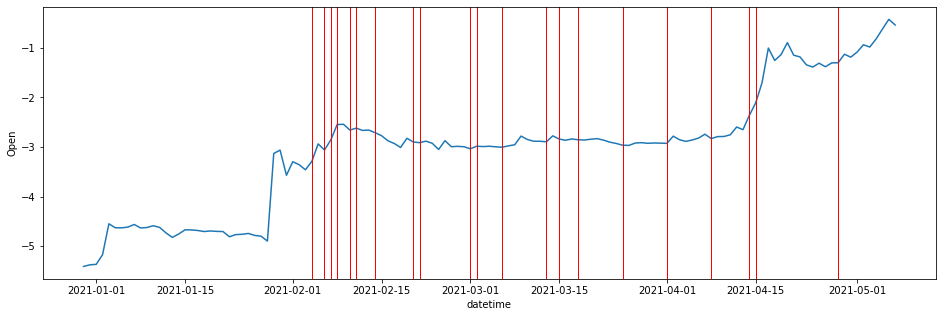

In [31]:
plt.figure(figsize=(16, 5))
sns.lineplot(y=np.log(dogecoin_data.loc[dogecoin_data.datetime > df.datetime.min(), 'Open']), x=dogecoin_data.datetime);

for date in df.loc[df.isDogecoin == 1, 'datetime']:
    plt.axvline(date, color='red', linestyle='-', linewidth=1);

# Close price

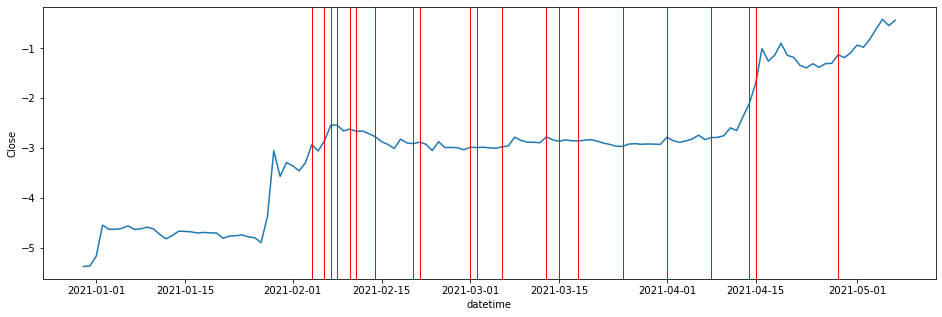

In [32]:
plt.figure(figsize=(16, 5))
sns.lineplot(y=np.log(dogecoin_data.loc[dogecoin_data.datetime > df.datetime.min(), 'Close']), x=dogecoin_data.datetime);

for date in df.loc[df.isDogecoin == 1, 'datetime']:
    plt.axvline(date, color='red', linestyle='-', linewidth=1);

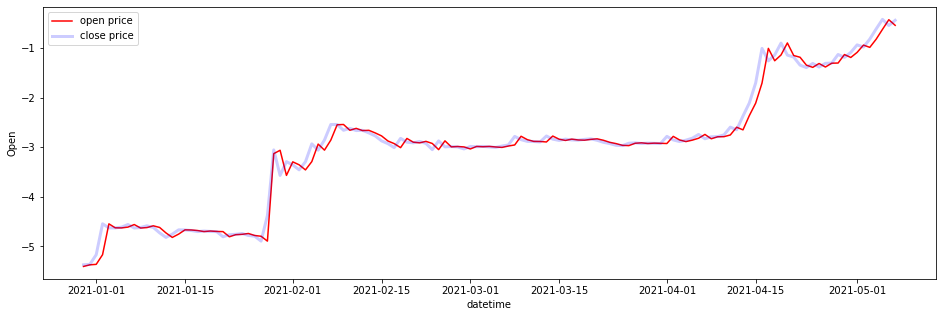

In [96]:
plt.figure(figsize=(16, 5))
sns.lineplot(y=np.log(dogecoin_data.loc[dogecoin_data.datetime > df.datetime.min(), 'Open']), x=dogecoin_data.datetime, 
            label='open price', color='red');
sns.lineplot(y=np.log(dogecoin_data.loc[dogecoin_data.datetime > df.datetime.min(), 'Close']), x=dogecoin_data.datetime,
            label='close price', alpha=0.2, linewidth=3, color='blue');
plt.legend();

The plot above shows that Open and Close price have pretty much the same chart, but the interesting thing it that Open price is a little bit shifted to right. So maybe I can predict them.

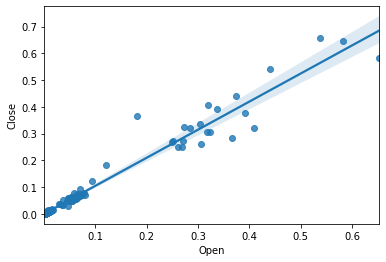

In [34]:
sns.regplot(data=dogecoin_data, x='Open', y='Close');

The plot above shows correlation between open and close price with heteroscedasticity. So it will be pretty hard to make a regression model that predicts one of the features based on another.

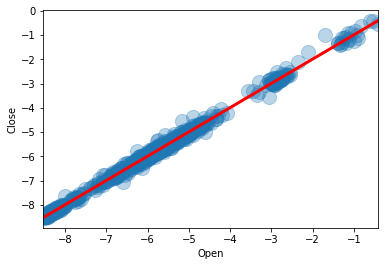

In [109]:
sns.regplot(x=np.log(dogecoin_data.Open), y=np.log(dogecoin_data.Close), line_kws={'color': 'r', 'linewidth': 3}, 
            scatter_kws={'alpha': 0.3, 's': 200});

After putting Open and Close features under the log the plot shows that there is strong linear correlation. The log just made influence from outliers smaller.

# A/B testing 

I am going to have two subsets A and B. 

- **A** subset will include standard deviation of price of dogecoin, when dogecoin was mentioned, with price of one day before and after this event. 
- **B** subset will contain standard deviation of price of samples that were taken from the remain data.  

Considering that price can grow through time, I am going to compare standard deviations of samples.

In [35]:
df[df.isDogecoin == 1].shape

(34, 5)

In [36]:
df.shape

(959, 5)

In [37]:
df.head()

,tweet_content,datetime,likes,retweets,isDogecoin
0,all tesla cars delivered in the final three da...,2020-12-29,73052,3507,0
1,"destiny, destinyno escaping that for me",2020-12-30,155133,11438,0
2,@tobyliiiiiiiiii are we sure this is real?,2020-12-30,5680,179,0
3,@harsimranbansal literally,2020-12-30,3033,56,0
4,@tesmanian_com this is very sensible. oppositi...,2020-12-30,4322,165,0


In [38]:
dogecoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2016-05-07,0.000224,0.000225,0.000221,0.000223,0.000223,83754.0,2016-05-07
1,2016-05-08,0.000222,0.000223,0.000220,0.000222,0.000222,46961.0,2016-05-08
2,2016-05-09,0.000222,0.000225,0.000220,0.000224,0.000224,75340.0,2016-05-09
3,2016-05-10,0.000222,0.000224,0.000220,0.000220,0.000220,76419.0,2016-05-10
4,2016-05-11,0.000220,0.000224,0.000220,0.000224,0.000224,71369.0,2016-05-11


In [39]:
def get_previous_and_following_day(date):
    one_day_timestamp = 86400
    
    current_date_timestamp = datetime.timestamp(date)
    previous_date_timestamp = current_date_timestamp - one_day_timestamp
    following_date_timestamp = current_date_timestamp + one_day_timestamp
    
    previous_date = datetime.fromtimestamp(previous_date_timestamp)
    following_date = datetime.fromtimestamp(following_date_timestamp)
    
    previous_date = datetime(previous_date.year, previous_date.month, previous_date.day)
    following_date = datetime(following_date.year, following_date.month, following_date.day)
    
    return previous_date, following_date

In [40]:
get_previous_and_following_day(df.loc[0, ['datetime']].values[0])

(datetime.datetime(2020, 12, 28, 0, 0), datetime.datetime(2020, 12, 30, 0, 0))

In [41]:
dogecoin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03
mean,0.009050,0.010098,0.008324,0.009395,0.009395,4.438836e+08
std,0.041315,0.047866,0.036952,0.043992,0.043992,2.952867e+09
min,0.000197,0.000205,0.000195,0.000197,0.000197,4.679900e+04
25%,0.001553,0.001676,0.001460,0.001567,0.001567,4.301310e+06
50%,0.002514,0.002577,0.002447,0.002516,0.002516,1.996860e+07
75%,0.003331,0.003467,0.003197,0.003325,0.003325,7.360159e+07
max,0.652842,0.695262,0.545102,0.657633,0.657633,6.941068e+10


In [42]:
dogecoin_data.datetime.max()

Timestamp('2021-05-07 00:00:00')

In [43]:
dogecoin_data.datetime.min()

Timestamp('2016-05-07 00:00:00')

In [44]:
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1827 non-null   object        
 1   Open       1823 non-null   float64       
 2   High       1823 non-null   float64       
 3   Low        1823 non-null   float64       
 4   Close      1823 non-null   float64       
 5   Adj Close  1823 non-null   float64       
 6   Volume     1823 non-null   float64       
 7   datetime   1827 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 114.3+ KB


In [45]:
def get_A_subset(tweets_data, price_data):
    
    dates_dogecoins_mentioned = tweets_data.loc[tweets_data.isDogecoin == 1, ['datetime']] 
    
    standard_deviations = []
    used_dates = [] # to remove them from B subset
    
    for date in dates_dogecoins_mentioned.datetime:
        previous_day, following_day = get_previous_and_following_day(date) 
        
        used_dates.append(previous_day)
        used_dates.append(date.to_pydatetime())
        used_dates.append(following_day)
                
        previous_day_price = price_data.loc[price_data.datetime == previous_day, 'High'].values
        following_day_price = price_data.loc[price_data.datetime == following_day, 'High'].values
        
        current_date_price = price_data.loc[price_data.datetime == date, 'High'].values
        
        prices = np.concatenate((previous_day_price, current_date_price, following_day_price), axis=0)
        standard_deviations.append(prices.std())
        
    return standard_deviations, used_dates

In [46]:
subset_A, dates = get_A_subset(df, dogecoin_data)

In [47]:
dates[:5]

[datetime.datetime(2021, 2, 3, 0, 0),
 datetime.datetime(2021, 2, 4, 0, 0),
 datetime.datetime(2021, 2, 5, 0, 0),
 datetime.datetime(2021, 2, 3, 0, 0),
 datetime.datetime(2021, 2, 4, 0, 0)]

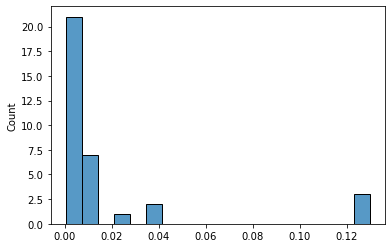

In [48]:
sns.histplot(subset_A);

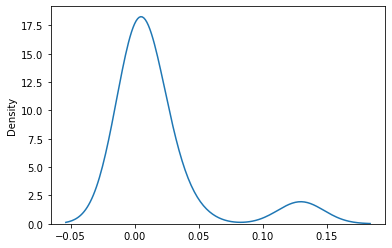

In [49]:
sns.kdeplot(subset_A);

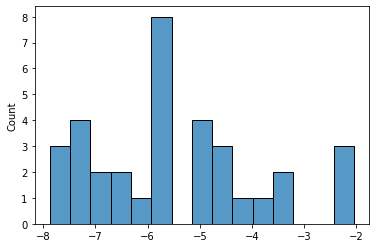

In [50]:
sns.histplot(np.log(subset_A), bins=15);

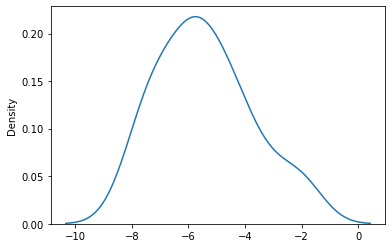

In [51]:
sns.kdeplot(np.log(subset_A));

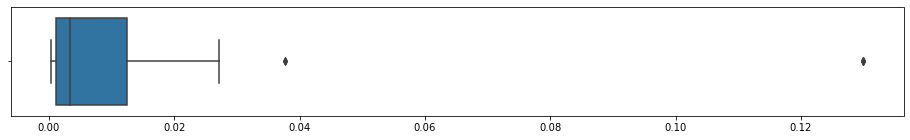

In [52]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=subset_A);

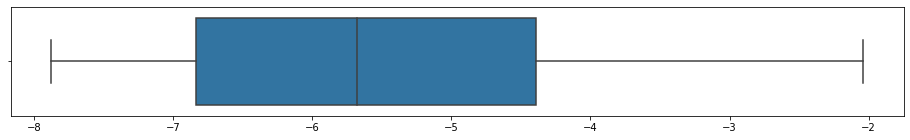

In [53]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=np.log(subset_A));

In [54]:
df.head(1)

,tweet_content,datetime,likes,retweets,isDogecoin
0,all tesla cars delivered in the final three da...,2020-12-29,73052,3507,0


In [55]:
df.shape

(959, 5)

In [56]:
pd.to_datetime(df.datetime).dt.date.head()

0    2020-12-29
1    2020-12-30
2    2020-12-30
3    2020-12-30
4    2020-12-30
Name: datetime, dtype: object

In [57]:
len(subset_A)

34

In [58]:
dogecoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2016-05-07,0.000224,0.000225,0.000221,0.000223,0.000223,83754.0,2016-05-07
1,2016-05-08,0.000222,0.000223,0.000220,0.000222,0.000222,46961.0,2016-05-08
2,2016-05-09,0.000222,0.000225,0.000220,0.000224,0.000224,75340.0,2016-05-09
3,2016-05-10,0.000222,0.000224,0.000220,0.000220,0.000220,76419.0,2016-05-10
4,2016-05-11,0.000220,0.000224,0.000220,0.000224,0.000224,71369.0,2016-05-11


In [59]:
def get_three_following_dates_samples(data, start_date, n_samples=30):
    start_index = data[data.datetime == start_date].index[0]
    end_index = data[data.datetime == data.datetime.max()].index[0]
    
    price_indeces = data.index.tolist()
    result = []
    
    while n_samples > 0:
        
        index = random.randint(start_index + 1, end_index - 1)
        indeces = [index - 1, index, index + 1]
        
        if len(set(price_indeces) & set(indeces)) < 3:
            continue;
        
        result.append(data.loc[indeces, 'High'].values)
        n_samples -= 1
        
    return result

In [60]:
get_three_following_dates_samples(dogecoin_data, df.datetime.min())[:5]

[array([0.323881, 0.339757, 0.397135]),
 array([0.009089, 0.008769, 0.008808]),
 array([0.695262, 0.663616, 0.653523]),
 array([0.061745, 0.06391 , 0.065068]),
 array([0.058921, 0.058866, 0.058828])]

In [61]:
def get_B_subset(tweets_data, price_data, n_samples):
    subset_A, used_dates = get_A_subset(tweets_data, price_data)

    price_data = price_data.copy()
    price_data = price_data[~price_data.datetime.isin(used_dates)]
    
    result = []
    
    samples = get_three_following_dates_samples(price_data, tweets_data.datetime.min(), n_samples=n_samples)
    for sample in samples:
        result.append(sample.std())
        
    return result

In [62]:
subset_B = get_B_subset(df, dogecoin_data, 100)

In [63]:
len(subset_B)

100

In [64]:
subset_B[:5]

[0.00016797883464558563,
 0.004075356371601839,
 0.016489216927704265,
 0.00045378506904578624,
 0.00016797883464558563]

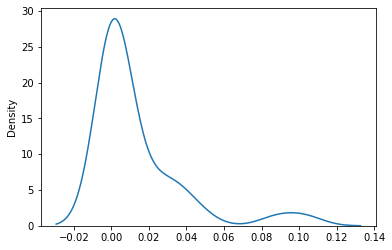

In [65]:
sns.kdeplot(subset_B);

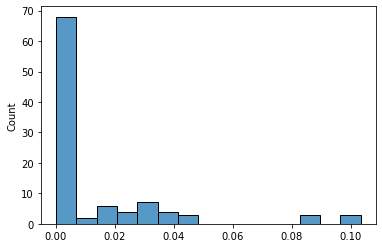

In [66]:
sns.histplot(subset_B);

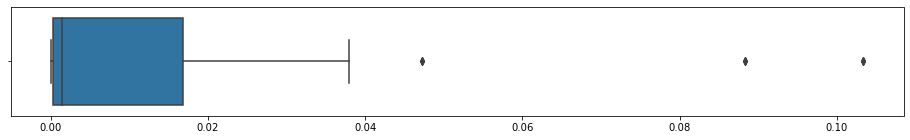

In [67]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=subset_B);

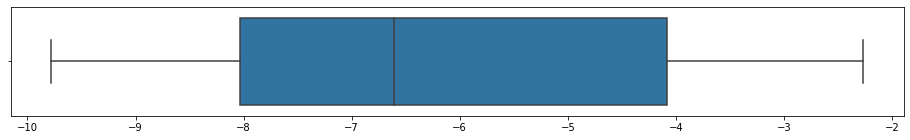

In [68]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=np.log(subset_B));

# Compare sets A and B 

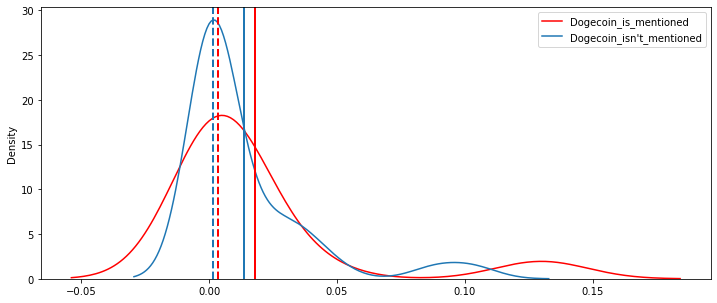

In [69]:
plt.figure(figsize=(12, 5))
sns.kdeplot(subset_A, color='r', label='Dogecoin_is_mentioned');
sns.kdeplot(subset_B, label="Dogecoin_isn't_mentioned");
plt.axvline(np.array(subset_A).mean(), color='red', linestyle='-', linewidth=2);
plt.axvline(np.array(subset_B).mean(), linestyle='-', linewidth=2);
plt.axvline(np.median(subset_A), color='red', linestyle='--', linewidth=2);
plt.axvline(np.median(subset_B), linestyle='--', linewidth=2);
plt.legend();

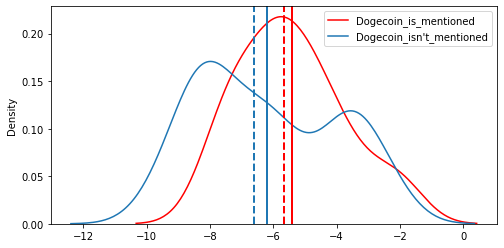

In [70]:
subset_A_log, subset_B_log = np.log(subset_A), np.log(subset_B)

plt.figure(figsize=(8, 4))
sns.kdeplot(subset_A_log, color='r', label='Dogecoin_is_mentioned');
sns.kdeplot(subset_B_log, label="Dogecoin_isn't_mentioned");
plt.axvline(subset_A_log.mean(), color='red', linestyle='-', linewidth=2);
plt.axvline(subset_B_log.mean(), linestyle='-', linewidth=2);
plt.axvline(np.median(subset_A_log), color='red', linestyle='--', linewidth=2);
plt.axvline(np.median(subset_B_log), linestyle='--', linewidth=2);
plt.legend();

In [71]:
stats.ttest_ind(subset_A, subset_B, equal_var=False)

Ttest_indResult(statistic=0.62665785978036, pvalue=0.5341492824062533)

In [72]:
stats.ttest_ind(np.log(subset_A), np.log(subset_B), equal_var=False)

Ttest_indResult(statistic=2.1632028854862964, pvalue=0.03371350889343663)

In [73]:
stats.ttest_ind(np.log(subset_A), np.log(subset_B), equal_var=True)

Ttest_indResult(statistic=1.8894888185543184, pvalue=0.061019639021547604)

In [74]:
stats.ttest_ind(subset_A, subset_B, equal_var=True)

Ttest_indResult(statistic=0.7569364314703704, pvalue=0.4504369143059066)

**Conclusion:**
By looking at the first plot can't say that there is a significant difference between two sets of standard deviations. But when I put subsets under log it made influence of outliers smaller, therefore distribution became more closer to normal and after that we can use t-test which showed us that subsets are different. With significance level 0.05

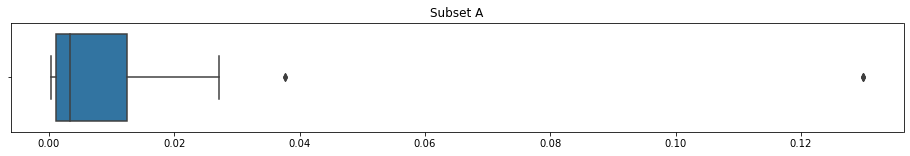

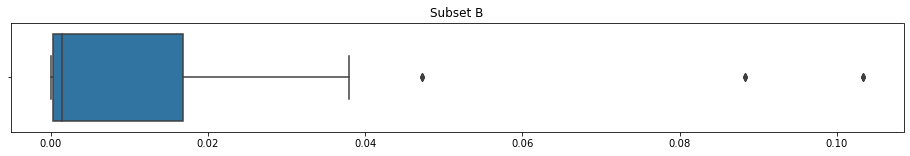

In [75]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=subset_A);
plt.title("Subset A")
plt.show()
plt.figure(figsize=(16, 2))
sns.boxplot(x=subset_B);
plt.title("Subset B");

**Conclusion:**
This two box plots show us that the median of these subsets are very close to each other. And also we can assume that the subset B on which Elon's tweets didn't have any influence still has a lot of outliers or in other words the grow of price is still chaotic. And only some of Elon's tweets predicted price jump.

# Experiment 1

I want to make a visualization which will show how many times the price grew after Elon had mentioned dogecoin comparing with moments when it went down. After this experiment I will able to measure the probability of grow of price.

In [76]:
def get_price_changes(tweets_data, price_data):
    data = tweets_data.copy()
    dates_dogecoin_was_mentioned = data.loc[data.isDogecoin == 1, 'datetime'].drop_duplicates()
    dates_before = pd.to_datetime(dates_dogecoin_was_mentioned) - pd.to_timedelta(1, unit="D")
    dates_after = pd.to_datetime(dates_dogecoin_was_mentioned) + pd.to_timedelta(1, unit="D")
    
    price_changes = price_data.loc[price_data.datetime.isin(dates_dogecoin_was_mentioned), 'High'].values - price_data.\
                                                    loc[price_data.datetime.isin(dates_before), 'High'].values
    price_changes = pd.Series(price_changes)
    
    price_changes2 = price_data.loc[price_data.datetime.isin(dates_after), 'High'].values - price_data.\
                                                    loc[price_data.datetime.isin(dates_before), 'High'].values
    price_changes2 = pd.Series(price_changes2)
    
    return price_changes, price_changes2

In [77]:
price_changes, price_changes_day_after = get_price_changes(df, dogecoin_data)

In [78]:
price_changes = price_changes.apply(lambda x: 1 if x > 0 else 0)
price_changes_day_after = price_changes_day_after.apply(lambda x: 1 if x > 0 else 0)

In [79]:
price_changes_during_two_days = price_changes | price_changes_day_after

In [80]:
price_changes_during_two_days.head()

0    1
1    1
2    1
3    1
4    0
dtype: int64

In [81]:
price_changes_during_two_days.replace([1, 0], ['increased', 'decreased'], inplace=True)

In [82]:
price_changes_during_two_days.head()

0    increased
1    increased
2    increased
3    increased
4    decreased
dtype: object

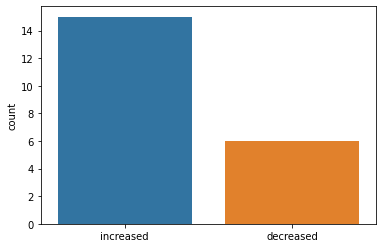

In [83]:
sns.countplot(x=price_changes_during_two_days);

In [84]:
price_changes_during_two_days.value_counts()

increased    15
decreased     6
dtype: int64

In [85]:
(6 * 100) / 15

40.0

**Conclusion:**
In 60% of cases during the next two days the price grew. And in 40% of cases during the next two days the price went down all time.